# Regression Predict Student Solution

© Explore Data Science Academy

---
### Honour Code

I {**YOUR NAME, YOUR SURNAME**}, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

### Predict Overview: Spain Electricity Shortfall Challenge

The government of Spain is considering an expansion of it's renewable energy resource infrastructure investments. As such, they require information on the trends and patterns of the countries renewable sources and fossil fuel energy generation. Your company has been awarded the contract to:

- 1. analyse the supplied data;
- 2. identify potential errors in the data and clean the existing data set;
- 3. determine if additional features can be added to enrich the data set;
- 4. build a model that is capable of forecasting the three hourly demand shortfalls;
- 5. evaluate the accuracy of the best machine learning model;
- 6. determine what features were most important in the model’s prediction decision, and
- 7. explain the inner working of the model to a non-technical audience.

Formally the problem statement was given to you, the senior data scientist, by your manager via email reads as follow:

> In this project you are tasked to model the shortfall between the energy generated by means of fossil fuels and various renewable sources - for the country of Spain. The daily shortfall, which will be referred to as the target variable, will be modelled as a function of various city-specific weather features such as `pressure`, `wind speed`, `humidity`, etc. As with all data science projects, the provided features are rarely adequate predictors of the target variable. As such, you are required to perform feature engineering to ensure that you will be able to accurately model Spain's three hourly shortfalls.
 
On top of this, she has provided you with a starter notebook containing vague explanations of what the main outcomes are. 

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| In this section you are required to import, and briefly discuss, the libraries that will be used throughout your analysis and modelling. |

---

In [152]:
# Libraries for data loading, data manipulation and data visulisation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Libraries for data preparation and model building
import re
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Setting global constants to ensure notebook results are reproducible
np.random.seed(42)

<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| In this section you are required to load the data from the `df_train` file into a DataFrame. |

---

In [153]:
train=pd.read_csv("df_train.csv")
train.head()

,Unnamed: 0,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,Barcelona_wind_deg,Madrid_clouds_all,Seville_wind_speed,Barcelona_rain_1h,Seville_pressure,Seville_rain_1h,Bilbao_snow_3h,Barcelona_pressure,Seville_rain_3h,Madrid_rain_1h,Barcelona_rain_3h,Valencia_snow_3h,Madrid_weather_id,Barcelona_weather_id,Bilbao_pressure,Seville_weather_id,Valencia_pressure,Seville_temp_max,Madrid_pressure,Valencia_temp_max,Valencia_temp,Bilbao_weather_id,Seville_temp,Valencia_humidity,Valencia_temp_min,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
0,0,2015-01-01 03:00:00,0.666667,level_5,0.0,0.666667,74.333333,64.000000,0.0,1.000000,0.0,223.333333,6.333333,42.666667,0.0,3.333333,0.0,sp25,0.0,0.0,1036.333333,0.0,0.0,0.0,0.0,800.0,800.0,1035.000000,800.0,1002.666667,274.254667,971.333333,269.888000,269.888000,800.0,274.254667,75.666667,269.888000,281.013000,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667
1,1,2015-01-01 06:00:00,0.333333,level_10,0.0,1.666667,78.333333,64.666667,0.0,1.000000,0.0,221.000000,4.000000,139.000000,0.0,3.333333,0.0,sp25,0.0,0.0,1037.333333,0.0,0.0,0.0,0.0,800.0,800.0,1035.666667,800.0,1004.333333,274.945000,972.666667,271.728333,271.728333,800.0,274.945000,71.000000,271.728333,280.561667,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667
2,2,2015-01-01 09:00:00,1.000000,level_9,0.0,1.000000,71.333333,64.333333,0.0,1.000000,0.0,214.333333,2.000000,326.000000,0.0,2.666667,0.0,sp25,0.0,0.0,1038.000000,0.0,0.0,0.0,0.0,800.0,800.0,1036.000000,800.0,1005.333333,278.792000,974.000000,278.008667,278.008667,800.0,278.792000,65.666667,278.008667,281.583667,272.708667,281.583667,275.027229,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,4274.666667
3,3,2015-01-01 12:00:00,1.000000,level_8,0.0,1.000000,65.333333,56.333333,0.0,1.000000,0.0,199.666667,2.333333,273.000000,0.0,4.000000,0.0,sp25,0.0,0.0,1037.000000,0.0,0.0,0.0,0.0,800.0,800.0,1036.000000,800.0,1009.000000,285.394000,994.666667,284.899552,284.899552,800.0,285.394000,54.000000,284.899552,283.434104,281.895219,283.434104,281.135063,281.135063,283.434104,281.135063,285.394000,281.895219,281.895219,5075.666667
4,4,2015-01-01 15:00:00,1.000000,level_7,0.0,1.000000,59.000000,57.000000,2.0,0.333333,0.0,185.000000,4.333333,260.000000,0.0,3.000000,0.0,sp25,0.0,0.0,1035.000000,0.0,0.0,0.0,0.0,800.0,800.0,1035.333333,800.0,NaN,285.513719,1035.333333,283.015115,283.015115,800.0,285.513719,58.333333,283.015115,284.213167,280.678437,284.213167,282.252063,282.252063,284.213167,282.252063,285.513719,280.678437,280.678437,6620.666667


In [154]:
test=pd.read_csv("df_test.csv")
test.head()

,Unnamed: 0,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,Barcelona_wind_deg,Madrid_clouds_all,Seville_wind_speed,Barcelona_rain_1h,Seville_pressure,Seville_rain_1h,Bilbao_snow_3h,Barcelona_pressure,Seville_rain_3h,Madrid_rain_1h,Barcelona_rain_3h,Valencia_snow_3h,Madrid_weather_id,Barcelona_weather_id,Bilbao_pressure,Seville_weather_id,Valencia_pressure,Seville_temp_max,Madrid_pressure,Valencia_temp_max,Valencia_temp,Bilbao_weather_id,Seville_temp,Valencia_humidity,Valencia_temp_min,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min
0,8763,2018-01-01 00:00:00,5.000000,level_8,0.0,5.000000,87.000000,71.333333,20.000000,3.000000,0.000000,193.333333,4.000000,176.666667,0.0,1.000000,0.0,sp25,0.0,0,1017.333333,0.0,0.0,0.0,0,800.0,800.000000,1025.666667,800.000000,NaN,284.483333,1030.000000,287.483333,287.483333,801.000000,283.673333,46.333333,287.483333,287.816667,280.816667,287.356667,276.150000,280.380000,286.816667,285.150000,283.150000,279.866667,279.150000
1,8764,2018-01-01 03:00:00,4.666667,level_8,0.0,5.333333,89.000000,78.000000,0.000000,3.666667,0.000000,143.333333,4.666667,266.666667,0.0,0.666667,0.0,sp25,0.0,0,1020.333333,0.0,0.0,0.0,0,800.0,800.333333,1026.666667,800.000000,NaN,282.483333,1030.333333,284.150000,284.150000,721.000000,281.673333,53.666667,284.150000,284.816667,280.483333,284.190000,277.816667,281.010000,283.483333,284.150000,281.150000,279.193333,278.150000
2,8765,2018-01-01 06:00:00,2.333333,level_7,0.0,5.000000,89.000000,89.666667,0.000000,2.333333,6.666667,130.000000,4.000000,263.333333,0.0,0.666667,0.0,sp25,0.0,0,1023.000000,0.0,0.0,0.0,0,800.0,800.000000,1025.333333,800.333333,NaN,280.816667,1030.666667,282.816667,282.816667,800.000000,280.613333,42.000000,282.816667,284.483333,276.483333,283.150000,276.816667,279.196667,281.816667,282.150000,280.483333,276.340000,276.150000
3,8766,2018-01-01 09:00:00,2.666667,level_7,0.0,5.333333,93.333333,82.666667,26.666667,5.666667,6.666667,196.666667,2.333333,86.666667,0.0,1.333333,0.0,sp25,0.0,0,1025.666667,0.0,0.0,0.0,0,800.0,800.000000,1025.000000,800.333333,NaN,281.150000,1032.333333,283.483333,283.483333,801.333333,279.936667,45.000000,283.483333,284.150000,277.150000,283.190000,279.150000,281.740000,282.150000,284.483333,279.150000,275.953333,274.483333
4,8767,2018-01-01 12:00:00,4.000000,level_7,0.0,8.666667,65.333333,64.000000,26.666667,10.666667,0.000000,233.333333,4.666667,283.333333,0.0,1.000000,0.0,sp25,0.0,0,1026.000000,0.0,0.0,0.0,0,800.0,800.333333,1022.333333,800.000000,NaN,287.150000,1032.333333,287.150000,287.150000,801.333333,285.570000,41.000000,287.150000,287.483333,281.150000,286.816667,281.816667,284.116667,286.150000,286.816667,284.483333,280.686667,280.150000


<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Exploratory data analysis ⚡ |
| :--------------------------- |
| In this section, you are required to perform an in-depth analysis of all the variables in the DataFrame. |

---


In [155]:
# look at data statistics
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 49 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            8763 non-null   int64  
 1   time                  8763 non-null   object 
 2   Madrid_wind_speed     8763 non-null   float64
 3   Valencia_wind_deg     8763 non-null   object 
 4   Bilbao_rain_1h        8763 non-null   float64
 5   Valencia_wind_speed   8763 non-null   float64
 6   Seville_humidity      8763 non-null   float64
 7   Madrid_humidity       8763 non-null   float64
 8   Bilbao_clouds_all     8763 non-null   float64
 9   Bilbao_wind_speed     8763 non-null   float64
 10  Seville_clouds_all    8763 non-null   float64
 11  Bilbao_wind_deg       8763 non-null   float64
 12  Barcelona_wind_speed  8763 non-null   float64
 13  Barcelona_wind_deg    8763 non-null   float64
 14  Madrid_clouds_all     8763 non-null   float64
 15  Seville_wind_speed   

In [156]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2920 entries, 0 to 2919
Data columns (total 48 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            2920 non-null   int64  
 1   time                  2920 non-null   object 
 2   Madrid_wind_speed     2920 non-null   float64
 3   Valencia_wind_deg     2920 non-null   object 
 4   Bilbao_rain_1h        2920 non-null   float64
 5   Valencia_wind_speed   2920 non-null   float64
 6   Seville_humidity      2920 non-null   float64
 7   Madrid_humidity       2920 non-null   float64
 8   Bilbao_clouds_all     2920 non-null   float64
 9   Bilbao_wind_speed     2920 non-null   float64
 10  Seville_clouds_all    2920 non-null   float64
 11  Bilbao_wind_deg       2920 non-null   float64
 12  Barcelona_wind_speed  2920 non-null   float64
 13  Barcelona_wind_deg    2920 non-null   float64
 14  Madrid_clouds_all     2920 non-null   float64
 15  Seville_wind_speed   

In [157]:
train.describe()

,Unnamed: 0,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,Barcelona_wind_deg,Madrid_clouds_all,Seville_wind_speed,Barcelona_rain_1h,Seville_rain_1h,Bilbao_snow_3h,Barcelona_pressure,Seville_rain_3h,Madrid_rain_1h,Barcelona_rain_3h,Valencia_snow_3h,Madrid_weather_id,Barcelona_weather_id,Bilbao_pressure,Seville_weather_id,Valencia_pressure,Seville_temp_max,Madrid_pressure,Valencia_temp_max,Valencia_temp,Bilbao_weather_id,Seville_temp,Valencia_humidity,Valencia_temp_min,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
count,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8.763000e+03,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,6695.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000
mean,4381.000000,2.425729,0.135753,2.586272,62.658793,57.414717,43.469132,1.850356,13.714748,158.957511,2.870497,190.544848,19.473392,2.425045,0.128906,0.039439,0.031912,1.377965e+03,0.000243,0.037818,0.000439,0.000205,773.527594,765.979687,1017.739549,774.658818,1012.051407,297.479527,1010.316920,291.337233,290.592152,724.722362,293.978903,65.247727,289.867648,291.157644,289.540309,289.855459,285.017973,286.422929,288.447422,287.966027,291.633356,288.419439,287.202203,10673.857612
std,2529.804538,1.850371,0.374901,2.411190,22.621226,24.335396,32.551044,1.695888,24.272482,102.056299,1.792197,89.077337,28.053660,1.672895,0.634730,0.175857,0.557264,1.407314e+04,0.003660,0.152639,0.003994,0.011866,77.313315,88.142235,10.046124,71.940009,9.506214,8.875812,22.198555,7.565692,7.162274,115.846537,7.920986,19.262322,6.907402,7.273538,9.752047,6.528111,6.705672,6.818682,6.102593,7.105590,8.178220,9.346796,9.206237,5218.046404
min,0.000000,0.000000,0.000000,0.000000,8.333333,6.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.706667e+02,0.000000,0.000000,0.000000,0.000000,211.000000,200.666667,971.333333,200.000000,972.666667,272.063000,927.666667,269.888000,269.888000,207.333333,272.063000,10.333333,269.888000,272.150000,264.983333,270.816667,264.483333,267.483333,269.483333,269.063000,270.150000,264.983333,264.983333,-6618.000000
25%,2190.500000,1.000000,0.000000,1.000000,44.333333,36.333333,10.000000,0.666667,0.000000,73.333333,1.666667,118.166667,0.000000,1.000000,0.000000,0.000000,0.000000,1.014000e+03,0.000000,0.000000,0.000000,0.000000,800.000000,800.000000,1013.000000,800.000000,1010.333333,291.312750,1012.333333,285.550167,285.150000,700.333333,288.282917,51.333333,284.783333,285.483333,282.150000,284.973443,280.085167,281.374167,284.150000,282.836776,285.816667,281.404281,280.299167,7390.333333
50%,4381.000000,2.000000,0.000000,1.666667,65.666667,58.000000,45.000000,1.000000,0.000000,147.000000,2.666667,200.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.018000e+03,0.000000,0.000000,0.000000,0.000000,800.000000,800.333333,1019.000000,800.000000,1015.000000,297.101667,1017.333333,291.037000,290.176667,800.000000,293.323333,67.000000,289.550000,290.150000,288.116177,289.416667,284.816667,286.158333,288.150000,287.630000,290.816667,287.053333,286.083333,11114.666667
75%,6571.500000,3.333333,0.100000,3.666667,82.000000,78.666667,75.000000,2.666667,20.000000,234.000000,4.000000,260.000000,33.333333,3.333333,0.000000,0.000000,0.000000,1.022000e+03,0.000000,0.000000,0.000000,0.000000,800.666667,801.000000,1024.000000,800.000000,1018.000000,304.150000,1022.00

In [158]:
test.describe()

,Unnamed: 0,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,Barcelona_wind_deg,Madrid_clouds_all,Seville_wind_speed,Barcelona_rain_1h,Seville_rain_1h,Bilbao_snow_3h,Barcelona_pressure,Seville_rain_3h,Madrid_rain_1h,Barcelona_rain_3h,Valencia_snow_3h,Madrid_weather_id,Barcelona_weather_id,Bilbao_pressure,Seville_weather_id,Valencia_pressure,Seville_temp_max,Madrid_pressure,Valencia_temp_max,Valencia_temp,Bilbao_weather_id,Seville_temp,Valencia_humidity,Valencia_temp_min,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min
count,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.0,2920.000000,2920.000000,2920.000000,2920.000000,2920.0,2920.000000,2920.000000,2920.000000,2920.000000,2466.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000
mean,10222.500000,2.457820,0.067517,3.012785,67.123516,62.644463,43.355422,2.283562,15.477283,162.643836,2.518094,178.979452,24.255822,2.657192,0.047397,0.046164,0.0,1015.317123,0.000001,0.059863,0.000006,0.0,758.820101,760.473307,1016.709132,772.226294,1013.148351,291.589360,1016.240411,291.439216,291.377796,737.039079,290.746255,64.623916,291.317184,290.695462,288.888393,289.911289,284.920684,286.522375,289.124971,288.483641,290.152431,287.869763,286.618130
std,843.075718,1.774838,0.153381,1.996340,20.611292,24.138393,30.486298,1.654787,25.289197,97.749873,1.625507,86.976503,29.430257,1.788870,0.162474,0.193432,0.0,7.021445,0.000074,0.193218,0.000217,0.0,93.536025,98.009846,8.773784,75.727539,6.528997,7.521748,9.624074,7.055448,7.113243,106.129916,7.738131,18.355766,7.176955,7.113599,9.089699,7.119411,6.803424,6.492355,7.168049,6.221324,7.906915,8.977511,8.733163
min,8763.000000,0.000000,0.000000,0.000000,11.666667,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,988.333333,0.000000,0.000000,0.000000,0.0,262.500000,207.333333,975.000000,259.500000,973.000000,273.816667,943.000000,273.816667,273.816667,207.666667,272.350000,13.000000,273.816667,273.816667,269.816667,272.650000,266.483333,268.120000,271.483333,270.138667,271.150000,268.713333,267.816667
25%,9492.750000,1.333333,0.000000,1.666667,52.000000,43.000000,13.333333,1.000000,0.000000,86.666667,1.333333,113.333333,0.000000,1.333333,0.000000,0.000000,0.0,1012.000000,0.000000,0.000000,0.000000,0.0,800.000000,800.000000,1013.333333,800.000000,1010.666667,286.150000,1013.666667,286.150000,285.816667,702.000000,285.356667,52.000000,285.816667,284.816667,281.483333,284.307500,280.150000,281.778333,283.483333,284.150000,284.483333,280.816667,279.816667
50%,10222.500000,2.000000,0.000000,2.333333,70.333333,63.000000,45.000000,1.666667,0.000000,140.000000,2.000000,176.666667,11.333333,2.333333,0.000000,0.000000,0.0,1016.000000,0.000000,0.000000,0.000000,0.0,800.000000,800.000000,1017.666667,800.000000,1014.666667,290.483333,1017.333333,291.150000,291.150000,800.000000,289.540000,65.000000,291.150000,290.150000,287.483333,289.483333,284.483333,286.265000,288.816667,288.483333,289.150000,286.396667,285.483333
75%,10952.250000,3.333333,0.000000,4.000000,85.000000,84.000000,75.000000,3.333333,20.000000,233.333333,3.666667,253.333333,40.000000,3.666667,0.000000,0.000000,0.0,1019.333333,0.000000,0.000000,0.000000,0.0,800.666667,801.000000,1022.000000,800.333333,1017.666667,296.483333,1021.333333,297.150000,297.150000,802.000000,295.674167,79.333333,297.150000,296.483333,295.483333,295.816667,289.816667,291.119167,295.150000,292.816667,295.150000,294.452500,2

In [159]:
train.shape

(8763, 49)

In [160]:
test.shape

(2920, 48)

In [161]:
# plot relevant feature interactions

In [162]:
# evaluate correlation

In [163]:
# have a look at feature distributions

<a id="four"></a>
## 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Data engineering ⚡ |
| :--------------------------- |
| In this section you are required to: clean the dataset, and possibly create new features - as identified in the EDA phase. |

---

In [164]:
# remove missing values/ features

In [165]:
# create new features
# Need to make all data types numerical
# Convert time to series time
train.time=pd.to_datetime(train.time, infer_datetime_format=True)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 49 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Unnamed: 0            8763 non-null   int64         
 1   time                  8763 non-null   datetime64[ns]
 2   Madrid_wind_speed     8763 non-null   float64       
 3   Valencia_wind_deg     8763 non-null   object        
 4   Bilbao_rain_1h        8763 non-null   float64       
 5   Valencia_wind_speed   8763 non-null   float64       
 6   Seville_humidity      8763 non-null   float64       
 7   Madrid_humidity       8763 non-null   float64       
 8   Bilbao_clouds_all     8763 non-null   float64       
 9   Bilbao_wind_speed     8763 non-null   float64       
 10  Seville_clouds_all    8763 non-null   float64       
 11  Bilbao_wind_deg       8763 non-null   float64       
 12  Barcelona_wind_speed  8763 non-null   float64       
 13  Barcelona_wind_deg

In [166]:
test.time=pd.to_datetime(test.time, infer_datetime_format=True)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2920 entries, 0 to 2919
Data columns (total 48 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Unnamed: 0            2920 non-null   int64         
 1   time                  2920 non-null   datetime64[ns]
 2   Madrid_wind_speed     2920 non-null   float64       
 3   Valencia_wind_deg     2920 non-null   object        
 4   Bilbao_rain_1h        2920 non-null   float64       
 5   Valencia_wind_speed   2920 non-null   float64       
 6   Seville_humidity      2920 non-null   float64       
 7   Madrid_humidity       2920 non-null   float64       
 8   Bilbao_clouds_all     2920 non-null   float64       
 9   Bilbao_wind_speed     2920 non-null   float64       
 10  Seville_clouds_all    2920 non-null   float64       
 11  Bilbao_wind_deg       2920 non-null   float64       
 12  Barcelona_wind_speed  2920 non-null   float64       
 13  Barcelona_wind_deg

In [167]:
from fast_ml.feature_engineering import FeatureEngineering_DateTime
dt_fe = FeatureEngineering_DateTime()
dt_fe.fit(train, datetime_variables=['time'])
train = dt_fe.transform(train)
train.head()

C:\Users\Shawn Johnson\OneDrive\Documents\Explore Data Science course\Python\lib\site-packages\fast_ml\feature_engineering.py:382: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df[pfx+f] = getattr(df[var].dt, f)


,Unnamed: 0,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,Barcelona_wind_deg,Madrid_clouds_all,Seville_wind_speed,Barcelona_rain_1h,Seville_pressure,Seville_rain_1h,Bilbao_snow_3h,Barcelona_pressure,Seville_rain_3h,Madrid_rain_1h,Barcelona_rain_3h,Valencia_snow_3h,Madrid_weather_id,Barcelona_weather_id,Bilbao_pressure,Seville_weather_id,Valencia_pressure,Seville_temp_max,Madrid_pressure,Valencia_temp_max,Valencia_temp,Bilbao_weather_id,Seville_temp,Valencia_humidity,Valencia_temp_min,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h,time:year,time:quarter,time:month,time:day,time:day_of_week,time:day_of_year,time:weekofyear,time:is_month_end,time:is_month_start,time:is_quarter_end,time:is_quarter_start,time:is_year_end,time:is_year_start,time:time,time:hour,time:minute,time:second,time:is_weekend,time:day_part
0,0,2015-01-01 03:00:00,0.666667,level_5,0.0,0.666667,74.333333,64.000000,0.0,1.000000,0.0,223.333333,6.333333,42.666667,0.0,3.333333,0.0,sp25,0.0,0.0,1036.333333,0.0,0.0,0.0,0.0,800.0,800.0,1035.000000,800.0,1002.666667,274.254667,971.333333,269.888000,269.888000,800.0,274.254667,75.666667,269.888000,281.013000,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667,2015,1,1,1,3,1,1,False,True,False,True,False,True,03:00:00,3,0,0,0,midnight
1,1,2015-01-01 06:00:00,0.333333,level_10,0.0,1.666667,78.333333,64.666667,0.0,1.000000,0.0,221.000000,4.000000,139.000000,0.0,3.333333,0.0,sp25,0.0,0.0,1037.333333,0.0,0.0,0.0,0.0,800.0,800.0,1035.666667,800.0,1004.333333,274.945000,972.666667,271.728333,271.728333,800.0,274.945000,71.000000,271.728333,280.561667,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667,2015,1,1,1,3,1,1,False,True,False,True,False,True,06:00:00,6,0,0,0,early morning
2,2,2015-01-01 09:00:00,1.000000,level_9,0.0,1.000000,71.333333,64.333333,0.0,1.000000,0.0,214.333333,2.000000,326.000000,0.0,2.666667,0.0,sp25,0.0,0.0,1038.000000,0.0,0.0,0.0,0.0,800.0,800.0,1036.000000,800.0,1005.333333,278.792000,974.000000,278.008667,278.008667,800.0,278.792000,65.666667,278.008667,281.583667,272.708667,281.583667,275.027229,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,4274.666667,2015,1,1,1,3,1,1,False,True,False,True,False,True,09:00:00,9,0,0,0,late morning
3,3,2015-01-01 12:00:00,1.000000,level_8,0.0,1.000000,65.333333,56.333333,0.0,1.000000,0.0,199.666667,2.333333,273.000000,0.0,4.000000,0.0,sp25,0.0,0.0,1037.000000,0.0,0.0,0.0,0.0,800.0,800.0,1036.000000,800.0,1009.000000,285.394000,994.666667,284.899552,284.899552,800.0,285.394000,54.000000,284.899552,283.434104,281.895219,283.434104,281.135063,281.135063,283.434104,281.135063,285.394000,281.895219,281.895219,5075.666667,2015,1,1,1,3,1,1,False,True,False,True,False,True,12:00:00,12,0,0,0,noon
4,4,2015-01-01 15:00:00,1.000000,level_7,0.0,1.000000,59.000000,57.000000,2.0,0.333333,0.0,185.000000,4.333333,260.000000,0.0,3.000000,0.0,sp25,0.0,0.0,1035.000000,0.0,0.0,0.0,0.0,800.0,800.0,1035.333333,800.0,NaN,285.513719,1035.333333,283.015115,283.015115,800.0,285.513719,58.333333,283.015115,284.213167,280.678437,284.213167,282.252063,282.252063,284.213167,282.252063,285.513719,280.678437,280.678437,6620.666667,2015,1,1,1,3,1,1,False,True,False,True,False,True,15:00:00,15,0,0,0,afternoon


In [168]:
dt_fe.fit(test, datetime_variables=['time'])
test = dt_fe.transform(test)
test.head()

C:\Users\Shawn Johnson\OneDrive\Documents\Explore Data Science course\Python\lib\site-packages\fast_ml\feature_engineering.py:382: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df[pfx+f] = getattr(df[var].dt, f)


,Unnamed: 0,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,Barcelona_wind_deg,Madrid_clouds_all,Seville_wind_speed,Barcelona_rain_1h,Seville_pressure,Seville_rain_1h,Bilbao_snow_3h,Barcelona_pressure,Seville_rain_3h,Madrid_rain_1h,Barcelona_rain_3h,Valencia_snow_3h,Madrid_weather_id,Barcelona_weather_id,Bilbao_pressure,Seville_weather_id,Valencia_pressure,Seville_temp_max,Madrid_pressure,Valencia_temp_max,Valencia_temp,Bilbao_weather_id,Seville_temp,Valencia_humidity,Valencia_temp_min,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,time:year,time:quarter,time:month,time:day,time:day_of_week,time:day_of_year,time:weekofyear,time:is_month_end,time:is_month_start,time:is_quarter_end,time:is_quarter_start,time:is_year_end,time:is_year_start,time:time,time:hour,time:minute,time:second,time:is_weekend,time:day_part
0,8763,2018-01-01 00:00:00,5.000000,level_8,0.0,5.000000,87.000000,71.333333,20.000000,3.000000,0.000000,193.333333,4.000000,176.666667,0.0,1.000000,0.0,sp25,0.0,0,1017.333333,0.0,0.0,0.0,0,800.0,800.000000,1025.666667,800.000000,NaN,284.483333,1030.000000,287.483333,287.483333,801.000000,283.673333,46.333333,287.483333,287.816667,280.816667,287.356667,276.150000,280.380000,286.816667,285.150000,283.150000,279.866667,279.150000,2018,1,1,1,0,1,1,False,True,False,True,False,True,00:00:00,0,0,0,0,None
1,8764,2018-01-01 03:00:00,4.666667,level_8,0.0,5.333333,89.000000,78.000000,0.000000,3.666667,0.000000,143.333333,4.666667,266.666667,0.0,0.666667,0.0,sp25,0.0,0,1020.333333,0.0,0.0,0.0,0,800.0,800.333333,1026.666667,800.000000,NaN,282.483333,1030.333333,284.150000,284.150000,721.000000,281.673333,53.666667,284.150000,284.816667,280.483333,284.190000,277.816667,281.010000,283.483333,284.150000,281.150000,279.193333,278.150000,2018,1,1,1,0,1,1,False,True,False,True,False,True,03:00:00,3,0,0,0,midnight
2,8765,2018-01-01 06:00:00,2.333333,level_7,0.0,5.000000,89.000000,89.666667,0.000000,2.333333,6.666667,130.000000,4.000000,263.333333,0.0,0.666667,0.0,sp25,0.0,0,1023.000000,0.0,0.0,0.0,0,800.0,800.000000,1025.333333,800.333333,NaN,280.816667,1030.666667,282.816667,282.816667,800.000000,280.613333,42.000000,282.816667,284.483333,276.483333,283.150000,276.816667,279.196667,281.816667,282.150000,280.483333,276.340000,276.150000,2018,1,1,1,0,1,1,False,True,False,True,False,True,06:00:00,6,0,0,0,early morning
3,8766,2018-01-01 09:00:00,2.666667,level_7,0.0,5.333333,93.333333,82.666667,26.666667,5.666667,6.666667,196.666667,2.333333,86.666667,0.0,1.333333,0.0,sp25,0.0,0,1025.666667,0.0,0.0,0.0,0,800.0,800.000000,1025.000000,800.333333,NaN,281.150000,1032.333333,283.483333,283.483333,801.333333,279.936667,45.000000,283.483333,284.150000,277.150000,283.190000,279.150000,281.740000,282.150000,284.483333,279.150000,275.953333,274.483333,2018,1,1,1,0,1,1,False,True,False,True,False,True,09:00:00,9,0,0,0,late morning
4,8767,2018-01-01 12:00:00,4.000000,level_7,0.0,8.666667,65.333333,64.000000,26.666667,10.666667,0.000000,233.333333,4.666667,283.333333,0.0,1.000000,0.0,sp25,0.0,0,1026.000000,0.0,0.0,0.0,0,800.0,800.333333,1022.333333,800.000000,NaN,287.150000,1032.333333,287.150000,287.150000,801.333333,285.570000,41.000000,287.150000,287.483333,281.150000,286.816667,281.816667,284.116667,286.150000,286.816667,284.483333,280.686667,280.150000,2018,1,1,1,0,1,1,False,True,False,True,False,True,12:00:00,12,0,0,0,noon


In [169]:
nunique_train = train.nunique().reset_index()
remove_col = nunique_train[(nunique_train[0]==len(train)) | (nunique_train[0]==0) | (nunique_train[0]==1)]['index'].tolist()
remove_col

['Unnamed: 0', 'time', 'time:minute', 'time:second']

In [170]:
train = train.drop(remove_col, axis=1)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 64 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Madrid_wind_speed      8763 non-null   float64
 1   Valencia_wind_deg      8763 non-null   object 
 2   Bilbao_rain_1h         8763 non-null   float64
 3   Valencia_wind_speed    8763 non-null   float64
 4   Seville_humidity       8763 non-null   float64
 5   Madrid_humidity        8763 non-null   float64
 6   Bilbao_clouds_all      8763 non-null   float64
 7   Bilbao_wind_speed      8763 non-null   float64
 8   Seville_clouds_all     8763 non-null   float64
 9   Bilbao_wind_deg        8763 non-null   float64
 10  Barcelona_wind_speed   8763 non-null   float64
 11  Barcelona_wind_deg     8763 non-null   float64
 12  Madrid_clouds_all      8763 non-null   float64
 13  Seville_wind_speed     8763 non-null   float64
 14  Barcelona_rain_1h      8763 non-null   float64
 15  Sevi

In [171]:
test = test.drop(remove_col, axis=1)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2920 entries, 0 to 2919
Data columns (total 63 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Madrid_wind_speed      2920 non-null   float64
 1   Valencia_wind_deg      2920 non-null   object 
 2   Bilbao_rain_1h         2920 non-null   float64
 3   Valencia_wind_speed    2920 non-null   float64
 4   Seville_humidity       2920 non-null   float64
 5   Madrid_humidity        2920 non-null   float64
 6   Bilbao_clouds_all      2920 non-null   float64
 7   Bilbao_wind_speed      2920 non-null   float64
 8   Seville_clouds_all     2920 non-null   float64
 9   Bilbao_wind_deg        2920 non-null   float64
 10  Barcelona_wind_speed   2920 non-null   float64
 11  Barcelona_wind_deg     2920 non-null   float64
 12  Madrid_clouds_all      2920 non-null   float64
 13  Seville_wind_speed     2920 non-null   float64
 14  Barcelona_rain_1h      2920 non-null   float64
 15  Sevi

In [172]:
nunique_train = train.nunique().reset_index()
remove_col = nunique_train[(nunique_train[0]==len(train)) | (nunique_train[0]==0) | (nunique_train[0]==1) ]['index'].tolist()
remove_col

[]

In [173]:
pd.options.display.max_columns = None
train.head()

,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,Barcelona_wind_deg,Madrid_clouds_all,Seville_wind_speed,Barcelona_rain_1h,Seville_pressure,Seville_rain_1h,Bilbao_snow_3h,Barcelona_pressure,Seville_rain_3h,Madrid_rain_1h,Barcelona_rain_3h,Valencia_snow_3h,Madrid_weather_id,Barcelona_weather_id,Bilbao_pressure,Seville_weather_id,Valencia_pressure,Seville_temp_max,Madrid_pressure,Valencia_temp_max,Valencia_temp,Bilbao_weather_id,Seville_temp,Valencia_humidity,Valencia_temp_min,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h,time:year,time:quarter,time:month,time:day,time:day_of_week,time:day_of_year,time:weekofyear,time:is_month_end,time:is_month_start,time:is_quarter_end,time:is_quarter_start,time:is_year_end,time:is_year_start,time:time,time:hour,time:is_weekend,time:day_part
0,0.666667,level_5,0.0,0.666667,74.333333,64.000000,0.0,1.000000,0.0,223.333333,6.333333,42.666667,0.0,3.333333,0.0,sp25,0.0,0.0,1036.333333,0.0,0.0,0.0,0.0,800.0,800.0,1035.000000,800.0,1002.666667,274.254667,971.333333,269.888000,269.888000,800.0,274.254667,75.666667,269.888000,281.013000,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667,2015,1,1,1,3,1,1,False,True,False,True,False,True,03:00:00,3,0,midnight
1,0.333333,level_10,0.0,1.666667,78.333333,64.666667,0.0,1.000000,0.0,221.000000,4.000000,139.000000,0.0,3.333333,0.0,sp25,0.0,0.0,1037.333333,0.0,0.0,0.0,0.0,800.0,800.0,1035.666667,800.0,1004.333333,274.945000,972.666667,271.728333,271.728333,800.0,274.945000,71.000000,271.728333,280.561667,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667,2015,1,1,1,3,1,1,False,True,False,True,False,True,06:00:00,6,0,early morning
2,1.000000,level_9,0.0,1.000000,71.333333,64.333333,0.0,1.000000,0.0,214.333333,2.000000,326.000000,0.0,2.666667,0.0,sp25,0.0,0.0,1038.000000,0.0,0.0,0.0,0.0,800.0,800.0,1036.000000,800.0,1005.333333,278.792000,974.000000,278.008667,278.008667,800.0,278.792000,65.666667,278.008667,281.583667,272.708667,281.583667,275.027229,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,4274.666667,2015,1,1,1,3,1,1,False,True,False,True,False,True,09:00:00,9,0,late morning
3,1.000000,level_8,0.0,1.000000,65.333333,56.333333,0.0,1.000000,0.0,199.666667,2.333333,273.000000,0.0,4.000000,0.0,sp25,0.0,0.0,1037.000000,0.0,0.0,0.0,0.0,800.0,800.0,1036.000000,800.0,1009.000000,285.394000,994.666667,284.899552,284.899552,800.0,285.394000,54.000000,284.899552,283.434104,281.895219,283.434104,281.135063,281.135063,283.434104,281.135063,285.394000,281.895219,281.895219,5075.666667,2015,1,1,1,3,1,1,False,True,False,True,False,True,12:00:00,12,0,noon
4,1.000000,level_7,0.0,1.000000,59.000000,57.000000,2.0,0.333333,0.0,185.000000,4.333333,260.000000,0.0,3.000000,0.0,sp25,0.0,0.0,1035.000000,0.0,0.0,0.0,0.0,800.0,800.0,1035.333333,800.0,NaN,285.513719,1035.333333,283.015115,283.015115,800.0,285.513719,58.333333,283.015115,284.213167,280.678437,284.213167,282.252063,282.252063,284.213167,282.252063,285.513719,280.678437,280.678437,6620.666667,2015,1,1,1,3,1,1,False,True,False,True,False,True,15:00:00,15,0,afternoon


In [174]:
train['time:is_weekend'] = train['time:is_weekend'].replace({0:False,1:True})
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 64 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Madrid_wind_speed      8763 non-null   float64
 1   Valencia_wind_deg      8763 non-null   object 
 2   Bilbao_rain_1h         8763 non-null   float64
 3   Valencia_wind_speed    8763 non-null   float64
 4   Seville_humidity       8763 non-null   float64
 5   Madrid_humidity        8763 non-null   float64
 6   Bilbao_clouds_all      8763 non-null   float64
 7   Bilbao_wind_speed      8763 non-null   float64
 8   Seville_clouds_all     8763 non-null   float64
 9   Bilbao_wind_deg        8763 non-null   float64
 10  Barcelona_wind_speed   8763 non-null   float64
 11  Barcelona_wind_deg     8763 non-null   float64
 12  Madrid_clouds_all      8763 non-null   float64
 13  Seville_wind_speed     8763 non-null   float64
 14  Barcelona_rain_1h      8763 non-null   float64
 15  Sevi

In [175]:
test['time:is_weekend'] = test['time:is_weekend'].replace({0:False,1:True})
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2920 entries, 0 to 2919
Data columns (total 63 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Madrid_wind_speed      2920 non-null   float64
 1   Valencia_wind_deg      2920 non-null   object 
 2   Bilbao_rain_1h         2920 non-null   float64
 3   Valencia_wind_speed    2920 non-null   float64
 4   Seville_humidity       2920 non-null   float64
 5   Madrid_humidity        2920 non-null   float64
 6   Bilbao_clouds_all      2920 non-null   float64
 7   Bilbao_wind_speed      2920 non-null   float64
 8   Seville_clouds_all     2920 non-null   float64
 9   Bilbao_wind_deg        2920 non-null   float64
 10  Barcelona_wind_speed   2920 non-null   float64
 11  Barcelona_wind_deg     2920 non-null   float64
 12  Madrid_clouds_all      2920 non-null   float64
 13  Seville_wind_speed     2920 non-null   float64
 14  Barcelona_rain_1h      2920 non-null   float64
 15  Sevi

In [176]:
train = train.drop(['time:time','time:is_year_start','time:is_quarter_start','time:is_month_start'],axis=1)
train.head()

,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,Barcelona_wind_deg,Madrid_clouds_all,Seville_wind_speed,Barcelona_rain_1h,Seville_pressure,Seville_rain_1h,Bilbao_snow_3h,Barcelona_pressure,Seville_rain_3h,Madrid_rain_1h,Barcelona_rain_3h,Valencia_snow_3h,Madrid_weather_id,Barcelona_weather_id,Bilbao_pressure,Seville_weather_id,Valencia_pressure,Seville_temp_max,Madrid_pressure,Valencia_temp_max,Valencia_temp,Bilbao_weather_id,Seville_temp,Valencia_humidity,Valencia_temp_min,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h,time:year,time:quarter,time:month,time:day,time:day_of_week,time:day_of_year,time:weekofyear,time:is_month_end,time:is_quarter_end,time:is_year_end,time:hour,time:is_weekend,time:day_part
0,0.666667,level_5,0.0,0.666667,74.333333,64.000000,0.0,1.000000,0.0,223.333333,6.333333,42.666667,0.0,3.333333,0.0,sp25,0.0,0.0,1036.333333,0.0,0.0,0.0,0.0,800.0,800.0,1035.000000,800.0,1002.666667,274.254667,971.333333,269.888000,269.888000,800.0,274.254667,75.666667,269.888000,281.013000,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667,2015,1,1,1,3,1,1,False,False,False,3,False,midnight
1,0.333333,level_10,0.0,1.666667,78.333333,64.666667,0.0,1.000000,0.0,221.000000,4.000000,139.000000,0.0,3.333333,0.0,sp25,0.0,0.0,1037.333333,0.0,0.0,0.0,0.0,800.0,800.0,1035.666667,800.0,1004.333333,274.945000,972.666667,271.728333,271.728333,800.0,274.945000,71.000000,271.728333,280.561667,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667,2015,1,1,1,3,1,1,False,False,False,6,False,early morning
2,1.000000,level_9,0.0,1.000000,71.333333,64.333333,0.0,1.000000,0.0,214.333333,2.000000,326.000000,0.0,2.666667,0.0,sp25,0.0,0.0,1038.000000,0.0,0.0,0.0,0.0,800.0,800.0,1036.000000,800.0,1005.333333,278.792000,974.000000,278.008667,278.008667,800.0,278.792000,65.666667,278.008667,281.583667,272.708667,281.583667,275.027229,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,4274.666667,2015,1,1,1,3,1,1,False,False,False,9,False,late morning
3,1.000000,level_8,0.0,1.000000,65.333333,56.333333,0.0,1.000000,0.0,199.666667,2.333333,273.000000,0.0,4.000000,0.0,sp25,0.0,0.0,1037.000000,0.0,0.0,0.0,0.0,800.0,800.0,1036.000000,800.0,1009.000000,285.394000,994.666667,284.899552,284.899552,800.0,285.394000,54.000000,284.899552,283.434104,281.895219,283.434104,281.135063,281.135063,283.434104,281.135063,285.394000,281.895219,281.895219,5075.666667,2015,1,1,1,3,1,1,False,False,False,12,False,noon
4,1.000000,level_7,0.0,1.000000,59.000000,57.000000,2.0,0.333333,0.0,185.000000,4.333333,260.000000,0.0,3.000000,0.0,sp25,0.0,0.0,1035.000000,0.0,0.0,0.0,0.0,800.0,800.0,1035.333333,800.0,NaN,285.513719,1035.333333,283.015115,283.015115,800.0,285.513719,58.333333,283.015115,284.213167,280.678437,284.213167,282.252063,282.252063,284.213167,282.252063,285.513719,280.678437,280.678437,6620.666667,2015,1,1,1,3,1,1,False,False,False,15,False,afternoon


In [177]:
test = test.drop(['time:time','time:is_year_start','time:is_quarter_start','time:is_month_start'],axis=1)
test.head()

,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,Barcelona_wind_deg,Madrid_clouds_all,Seville_wind_speed,Barcelona_rain_1h,Seville_pressure,Seville_rain_1h,Bilbao_snow_3h,Barcelona_pressure,Seville_rain_3h,Madrid_rain_1h,Barcelona_rain_3h,Valencia_snow_3h,Madrid_weather_id,Barcelona_weather_id,Bilbao_pressure,Seville_weather_id,Valencia_pressure,Seville_temp_max,Madrid_pressure,Valencia_temp_max,Valencia_temp,Bilbao_weather_id,Seville_temp,Valencia_humidity,Valencia_temp_min,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,time:year,time:quarter,time:month,time:day,time:day_of_week,time:day_of_year,time:weekofyear,time:is_month_end,time:is_quarter_end,time:is_year_end,time:hour,time:is_weekend,time:day_part
0,5.000000,level_8,0.0,5.000000,87.000000,71.333333,20.000000,3.000000,0.000000,193.333333,4.000000,176.666667,0.0,1.000000,0.0,sp25,0.0,0,1017.333333,0.0,0.0,0.0,0,800.0,800.000000,1025.666667,800.000000,NaN,284.483333,1030.000000,287.483333,287.483333,801.000000,283.673333,46.333333,287.483333,287.816667,280.816667,287.356667,276.150000,280.380000,286.816667,285.150000,283.150000,279.866667,279.150000,2018,1,1,1,0,1,1,False,False,False,0,False,None
1,4.666667,level_8,0.0,5.333333,89.000000,78.000000,0.000000,3.666667,0.000000,143.333333,4.666667,266.666667,0.0,0.666667,0.0,sp25,0.0,0,1020.333333,0.0,0.0,0.0,0,800.0,800.333333,1026.666667,800.000000,NaN,282.483333,1030.333333,284.150000,284.150000,721.000000,281.673333,53.666667,284.150000,284.816667,280.483333,284.190000,277.816667,281.010000,283.483333,284.150000,281.150000,279.193333,278.150000,2018,1,1,1,0,1,1,False,False,False,3,False,midnight
2,2.333333,level_7,0.0,5.000000,89.000000,89.666667,0.000000,2.333333,6.666667,130.000000,4.000000,263.333333,0.0,0.666667,0.0,sp25,0.0,0,1023.000000,0.0,0.0,0.0,0,800.0,800.000000,1025.333333,800.333333,NaN,280.816667,1030.666667,282.816667,282.816667,800.000000,280.613333,42.000000,282.816667,284.483333,276.483333,283.150000,276.816667,279.196667,281.816667,282.150000,280.483333,276.340000,276.150000,2018,1,1,1,0,1,1,False,False,False,6,False,early morning
3,2.666667,level_7,0.0,5.333333,93.333333,82.666667,26.666667,5.666667,6.666667,196.666667,2.333333,86.666667,0.0,1.333333,0.0,sp25,0.0,0,1025.666667,0.0,0.0,0.0,0,800.0,800.000000,1025.000000,800.333333,NaN,281.150000,1032.333333,283.483333,283.483333,801.333333,279.936667,45.000000,283.483333,284.150000,277.150000,283.190000,279.150000,281.740000,282.150000,284.483333,279.150000,275.953333,274.483333,2018,1,1,1,0,1,1,False,False,False,9,False,late morning
4,4.000000,level_7,0.0,8.666667,65.333333,64.000000,26.666667,10.666667,0.000000,233.333333,4.666667,283.333333,0.0,1.000000,0.0,sp25,0.0,0,1026.000000,0.0,0.0,0.0,0,800.0,800.333333,1022.333333,800.000000,NaN,287.150000,1032.333333,287.150000,287.150000,801.333333,285.570000,41.000000,287.150000,287.483333,281.150000,286.816667,281.816667,284.116667,286.150000,286.816667,284.483333,280.686667,280.150000,2018,1,1,1,0,1,1,False,False,False,12,False,noon


In [178]:
train[train.isna().any(axis=1)]

,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,Barcelona_wind_deg,Madrid_clouds_all,Seville_wind_speed,Barcelona_rain_1h,Seville_pressure,Seville_rain_1h,Bilbao_snow_3h,Barcelona_pressure,Seville_rain_3h,Madrid_rain_1h,Barcelona_rain_3h,Valencia_snow_3h,Madrid_weather_id,Barcelona_weather_id,Bilbao_pressure,Seville_weather_id,Valencia_pressure,Seville_temp_max,Madrid_pressure,Valencia_temp_max,Valencia_temp,Bilbao_weather_id,Seville_temp,Valencia_humidity,Valencia_temp_min,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h,time:year,time:quarter,time:month,time:day,time:day_of_week,time:day_of_year,time:weekofyear,time:is_month_end,time:is_quarter_end,time:is_year_end,time:hour,time:is_weekend,time:day_part
4,1.000000,level_7,0.0,1.000000,59.000000,57.000000,2.000000,0.333333,0.000000,185.000000,4.333333,260.000000,0.000000,3.000000,0.0,sp25,0.0,0.0,1035.000000,0.0,0.0,0.0,0.0,800.000000,800.000000,1035.333333,800.000000,NaN,285.513719,1035.333333,283.015115,283.015115,800.000000,285.513719,58.333333,283.015115,284.213167,280.678437,284.213167,282.252063,282.252063,284.213167,282.252063,285.513719,280.678437,280.678437,6620.666667,2015,1,1,1,3,1,1,False,False,False,15,False,afternoon
5,1.000000,level_7,0.0,1.000000,69.666667,67.333333,12.333333,0.666667,0.000000,191.333333,4.666667,254.666667,0.000000,2.666667,0.0,sp25,0.0,0.0,1035.666667,0.0,0.0,0.0,0.0,800.000000,800.000000,1035.666667,800.000000,NaN,282.077844,1013.333333,277.622563,277.622563,800.666667,282.077844,72.666667,277.622563,284.165625,274.639229,284.165625,277.919000,277.919000,284.165625,277.919000,282.077844,274.639229,274.639229,6842.000000,2015,1,1,1,3,1,1,False,False,False,18,False,evening
7,1.000000,level_9,0.0,1.000000,83.666667,64.000000,8.666667,1.333333,0.000000,238.666667,2.000000,310.000000,0.000000,2.333333,0.0,sp25,0.0,0.0,1037.666667,0.0,0.0,0.0,0.0,800.000000,800.000000,1036.000000,800.000000,1005.666667,276.457333,974.666667,271.040667,271.040667,800.333333,276.457333,82.000000,271.040667,282.474000,266.882333,282.474000,272.903167,272.903167,282.474000,272.903167,276.457333,266.882333,266.882333,10866.000000,2015,1,1,2,4,2,1,False,False,False,0,False,None
12,1.000000,level_7,0.0,1.000000,74.333333,55.666667,20.000000,0.666667,0.000000,260.666667,2.000000,261.333333,8.666667,3.666667,0.0,sp25,0.0,0.0,1036.000000,0.0,0.0,0.0,0.0,800.333333,800.000000,1038.000000,800.000000,NaN,285.707052,1037.333333,284.821781,284.821781,801.000000,285.707052,46.333333,284.821781,285.902333,282.448177,285.902333,282.730115,282.730115,285.902333,282.730115,285.707052,282.448177,282.448177,65.000000,2015,1,1,2,4,2,1,False,False,False,15,False,afternoon
15,1.000000,level_9,0.0,1.000000,88.000000,69.666667,2.000000,1.000000,0.000000,199.000000,2.666667,318.666667,1.333333,3.000000,0.0,sp25,0.0,0.0,1036.666667,0.0,0.0,0.0,0.0,800.000000,801.333333,1037.000000,800.000000,1006.666667,277.625333,986.666667,272.211000,272.211000,800.000000,277.625333,78.666667,272.211000,283.386667,269.146167,283.386667,273.145219,273.145219,283.386667,273.145219,277.625333,269.146167,269.146167,7125.333333,2015,1,1,3,5,3,1,False,False,False,0,True,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,1.000000,level_8,0.0,2.333333,95.333333,100.000000,0.000000,4.666667,12.000000,143.333333,1.000000,280.000000,76.000000,0.333333,0.0,sp22,0.0,0.0,1024.000000,0.0,0.0,0.0,0.0,803.000000,800.000000,1021.000000,800.666667,NaN,283.816667,1027.000000,283.816667,283.816667,773.666667,282.806667,74.333333,283.816667,283.483333,278.1

In [179]:
train['time:day_part'] = train['time:day_part'].fillna(value=np.nan)
train['time:day_part'].unique()

array(['midnight', 'early morning', 'late morning', 'noon', 'afternoon',
       'evening', 'night', nan], dtype=object)

In [180]:
test['time:day_part'] = test['time:day_part'].fillna(value=np.nan)
test['time:day_part'].unique()

array([nan, 'midnight', 'early morning', 'late morning', 'noon',
       'afternoon', 'evening', 'night'], dtype=object)

In [181]:
round(train.isnull().sum()*100/len(train),2).sort_values(ascending=False)[:5]

Valencia_pressure    23.6
time:day_part        12.5
Valencia_temp         0.0
Seville_temp          0.0
Valencia_humidity     0.0
dtype: float64

In [182]:
train['time:day_part'] = train['time:day_part'].fillna(value='midnight')
round(train.isnull().sum()*100/len(train),2).sort_values(ascending=False)[:5]

Valencia_pressure    23.6
Madrid_wind_speed     0.0
Valencia_temp         0.0
Seville_temp          0.0
Valencia_humidity     0.0
dtype: float64

In [183]:
test['time:day_part'] = test['time:day_part'].fillna(value='midnight')
round(test.isnull().sum()*100/len(test),2).sort_values(ascending=False)[:5]

Valencia_pressure    15.55
Madrid_wind_speed     0.00
Valencia_temp_max     0.00
Bilbao_weather_id     0.00
Seville_temp          0.00
dtype: float64

In [184]:
train['time:day_part']=train['time:day_part'].replace({'midnight':0, 'early morning':1, 'late morning':2, 'noon':3,
                                                       'afternoon':4,'evening':5, 'night':6 })
      
train['time:day_part'].value_counts()

0    2191
1    1096
2    1096
3    1096
6    1096
4    1094
5    1094
Name: time:day_part, dtype: int64

In [185]:
test['time:day_part']=test['time:day_part'].replace({'midnight':0, 'early morning':1, 'late morning':2, 'noon':3,
                                                       'afternoon':4,'evening':5, 'night':6 })
      
test['time:day_part'].value_counts()

0    730
1    365
2    365
3    365
4    365
5    365
6    365
Name: time:day_part, dtype: int64

In [186]:
train[train.isna().any(axis=1)]

,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,Barcelona_wind_deg,Madrid_clouds_all,Seville_wind_speed,Barcelona_rain_1h,Seville_pressure,Seville_rain_1h,Bilbao_snow_3h,Barcelona_pressure,Seville_rain_3h,Madrid_rain_1h,Barcelona_rain_3h,Valencia_snow_3h,Madrid_weather_id,Barcelona_weather_id,Bilbao_pressure,Seville_weather_id,Valencia_pressure,Seville_temp_max,Madrid_pressure,Valencia_temp_max,Valencia_temp,Bilbao_weather_id,Seville_temp,Valencia_humidity,Valencia_temp_min,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h,time:year,time:quarter,time:month,time:day,time:day_of_week,time:day_of_year,time:weekofyear,time:is_month_end,time:is_quarter_end,time:is_year_end,time:hour,time:is_weekend,time:day_part
4,1.000000,level_7,0.0,1.000000,59.000000,57.000000,2.000000,0.333333,0.000000,185.000000,4.333333,260.000000,0.000000,3.000000,0.0,sp25,0.0,0.0,1035.000000,0.0,0.0,0.0,0.0,800.000000,800.000000,1035.333333,800.000000,NaN,285.513719,1035.333333,283.015115,283.015115,800.000000,285.513719,58.333333,283.015115,284.213167,280.678437,284.213167,282.252063,282.252063,284.213167,282.252063,285.513719,280.678437,280.678437,6620.666667,2015,1,1,1,3,1,1,False,False,False,15,False,4
5,1.000000,level_7,0.0,1.000000,69.666667,67.333333,12.333333,0.666667,0.000000,191.333333,4.666667,254.666667,0.000000,2.666667,0.0,sp25,0.0,0.0,1035.666667,0.0,0.0,0.0,0.0,800.000000,800.000000,1035.666667,800.000000,NaN,282.077844,1013.333333,277.622563,277.622563,800.666667,282.077844,72.666667,277.622563,284.165625,274.639229,284.165625,277.919000,277.919000,284.165625,277.919000,282.077844,274.639229,274.639229,6842.000000,2015,1,1,1,3,1,1,False,False,False,18,False,5
12,1.000000,level_7,0.0,1.000000,74.333333,55.666667,20.000000,0.666667,0.000000,260.666667,2.000000,261.333333,8.666667,3.666667,0.0,sp25,0.0,0.0,1036.000000,0.0,0.0,0.0,0.0,800.333333,800.000000,1038.000000,800.000000,NaN,285.707052,1037.333333,284.821781,284.821781,801.000000,285.707052,46.333333,284.821781,285.902333,282.448177,285.902333,282.730115,282.730115,285.902333,282.730115,285.707052,282.448177,282.448177,65.000000,2015,1,1,2,4,2,1,False,False,False,15,False,4
50,1.000000,level_6,0.0,1.000000,75.333333,71.666667,0.000000,1.000000,0.000000,210.333333,0.666667,222.666667,0.000000,3.000000,0.3,sp23,0.0,0.0,1030.000000,0.0,0.0,0.0,0.0,800.000000,500.000000,1030.333333,800.000000,NaN,283.897948,1030.333333,282.978229,282.978229,800.000000,283.897948,79.000000,282.978229,284.117385,280.253500,284.117385,281.581281,281.581281,284.117385,281.581281,283.897948,280.253500,280.253500,14613.666667,2015,1,1,7,2,7,2,False,False,False,15,False,4
51,1.000000,level_5,0.0,1.000000,84.000000,73.000000,0.000000,1.000000,0.000000,201.333333,1.000000,322.000000,0.000000,3.000000,0.1,sp25,0.0,0.0,1028.666667,0.0,0.0,0.0,0.0,800.000000,700.333333,1031.000000,800.000000,NaN,280.711250,995.333333,280.091833,280.091833,800.000000,280.711250,89.333333,280.091833,284.339063,273.492500,284.339063,278.329104,278.329104,284.339063,278.329104,280.711250,273.492500,273.492500,14671.000000,2015,1,1,7,2,7,2,False,False,False,18,False,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,1.000000,level_8,0.0,2.333333,95.333333,100.000000,0.000000,4.666667,12.000000,143.333333,1.000000,280.000000,76.000000,0.333333,0.0,sp22,0.0,0.0,1024.000000,0.0,0.0,0.0,0.0,803.000000,800.000000,1021.000000,800.666667,NaN,283.816667,1027.000000,283.816667,283.816667,773.666667,282.806667,74.333333,283.816667,283.483333,278.150000,281.983333,283.816667,286.443333

In [187]:
# Engineer existing features
# Need to sort out Valencia_wind_deg
train.Valencia_wind_deg.value_counts()

level_1     1072
level_5      915
level_4      914
level_3      890
level_7      882
level_6      881
level_2      874
level_10     839
level_8      798
level_9      698
Name: Valencia_wind_deg, dtype: int64

In [188]:
# Clean it up of non-alphanumeric characters
train = train.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
train.head()

,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,Barcelona_wind_deg,Madrid_clouds_all,Seville_wind_speed,Barcelona_rain_1h,Seville_pressure,Seville_rain_1h,Bilbao_snow_3h,Barcelona_pressure,Seville_rain_3h,Madrid_rain_1h,Barcelona_rain_3h,Valencia_snow_3h,Madrid_weather_id,Barcelona_weather_id,Bilbao_pressure,Seville_weather_id,Valencia_pressure,Seville_temp_max,Madrid_pressure,Valencia_temp_max,Valencia_temp,Bilbao_weather_id,Seville_temp,Valencia_humidity,Valencia_temp_min,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h,timeyear,timequarter,timemonth,timeday,timeday_of_week,timeday_of_year,timeweekofyear,timeis_month_end,timeis_quarter_end,timeis_year_end,timehour,timeis_weekend,timeday_part
0,0.666667,level_5,0.0,0.666667,74.333333,64.000000,0.0,1.000000,0.0,223.333333,6.333333,42.666667,0.0,3.333333,0.0,sp25,0.0,0.0,1036.333333,0.0,0.0,0.0,0.0,800.0,800.0,1035.000000,800.0,1002.666667,274.254667,971.333333,269.888000,269.888000,800.0,274.254667,75.666667,269.888000,281.013000,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667,2015,1,1,1,3,1,1,False,False,False,3,False,0
1,0.333333,level_10,0.0,1.666667,78.333333,64.666667,0.0,1.000000,0.0,221.000000,4.000000,139.000000,0.0,3.333333,0.0,sp25,0.0,0.0,1037.333333,0.0,0.0,0.0,0.0,800.0,800.0,1035.666667,800.0,1004.333333,274.945000,972.666667,271.728333,271.728333,800.0,274.945000,71.000000,271.728333,280.561667,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667,2015,1,1,1,3,1,1,False,False,False,6,False,1
2,1.000000,level_9,0.0,1.000000,71.333333,64.333333,0.0,1.000000,0.0,214.333333,2.000000,326.000000,0.0,2.666667,0.0,sp25,0.0,0.0,1038.000000,0.0,0.0,0.0,0.0,800.0,800.0,1036.000000,800.0,1005.333333,278.792000,974.000000,278.008667,278.008667,800.0,278.792000,65.666667,278.008667,281.583667,272.708667,281.583667,275.027229,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,4274.666667,2015,1,1,1,3,1,1,False,False,False,9,False,2
3,1.000000,level_8,0.0,1.000000,65.333333,56.333333,0.0,1.000000,0.0,199.666667,2.333333,273.000000,0.0,4.000000,0.0,sp25,0.0,0.0,1037.000000,0.0,0.0,0.0,0.0,800.0,800.0,1036.000000,800.0,1009.000000,285.394000,994.666667,284.899552,284.899552,800.0,285.394000,54.000000,284.899552,283.434104,281.895219,283.434104,281.135063,281.135063,283.434104,281.135063,285.394000,281.895219,281.895219,5075.666667,2015,1,1,1,3,1,1,False,False,False,12,False,3
4,1.000000,level_7,0.0,1.000000,59.000000,57.000000,2.0,0.333333,0.0,185.000000,4.333333,260.000000,0.0,3.000000,0.0,sp25,0.0,0.0,1035.000000,0.0,0.0,0.0,0.0,800.0,800.0,1035.333333,800.0,NaN,285.513719,1035.333333,283.015115,283.015115,800.0,285.513719,58.333333,283.015115,284.213167,280.678437,284.213167,282.252063,282.252063,284.213167,282.252063,285.513719,280.678437,280.678437,6620.666667,2015,1,1,1,3,1,1,False,False,False,15,False,4


In [189]:
test = test.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
test.head()

,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,Barcelona_wind_deg,Madrid_clouds_all,Seville_wind_speed,Barcelona_rain_1h,Seville_pressure,Seville_rain_1h,Bilbao_snow_3h,Barcelona_pressure,Seville_rain_3h,Madrid_rain_1h,Barcelona_rain_3h,Valencia_snow_3h,Madrid_weather_id,Barcelona_weather_id,Bilbao_pressure,Seville_weather_id,Valencia_pressure,Seville_temp_max,Madrid_pressure,Valencia_temp_max,Valencia_temp,Bilbao_weather_id,Seville_temp,Valencia_humidity,Valencia_temp_min,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,timeyear,timequarter,timemonth,timeday,timeday_of_week,timeday_of_year,timeweekofyear,timeis_month_end,timeis_quarter_end,timeis_year_end,timehour,timeis_weekend,timeday_part
0,5.000000,level_8,0.0,5.000000,87.000000,71.333333,20.000000,3.000000,0.000000,193.333333,4.000000,176.666667,0.0,1.000000,0.0,sp25,0.0,0,1017.333333,0.0,0.0,0.0,0,800.0,800.000000,1025.666667,800.000000,NaN,284.483333,1030.000000,287.483333,287.483333,801.000000,283.673333,46.333333,287.483333,287.816667,280.816667,287.356667,276.150000,280.380000,286.816667,285.150000,283.150000,279.866667,279.150000,2018,1,1,1,0,1,1,False,False,False,0,False,0
1,4.666667,level_8,0.0,5.333333,89.000000,78.000000,0.000000,3.666667,0.000000,143.333333,4.666667,266.666667,0.0,0.666667,0.0,sp25,0.0,0,1020.333333,0.0,0.0,0.0,0,800.0,800.333333,1026.666667,800.000000,NaN,282.483333,1030.333333,284.150000,284.150000,721.000000,281.673333,53.666667,284.150000,284.816667,280.483333,284.190000,277.816667,281.010000,283.483333,284.150000,281.150000,279.193333,278.150000,2018,1,1,1,0,1,1,False,False,False,3,False,0
2,2.333333,level_7,0.0,5.000000,89.000000,89.666667,0.000000,2.333333,6.666667,130.000000,4.000000,263.333333,0.0,0.666667,0.0,sp25,0.0,0,1023.000000,0.0,0.0,0.0,0,800.0,800.000000,1025.333333,800.333333,NaN,280.816667,1030.666667,282.816667,282.816667,800.000000,280.613333,42.000000,282.816667,284.483333,276.483333,283.150000,276.816667,279.196667,281.816667,282.150000,280.483333,276.340000,276.150000,2018,1,1,1,0,1,1,False,False,False,6,False,1
3,2.666667,level_7,0.0,5.333333,93.333333,82.666667,26.666667,5.666667,6.666667,196.666667,2.333333,86.666667,0.0,1.333333,0.0,sp25,0.0,0,1025.666667,0.0,0.0,0.0,0,800.0,800.000000,1025.000000,800.333333,NaN,281.150000,1032.333333,283.483333,283.483333,801.333333,279.936667,45.000000,283.483333,284.150000,277.150000,283.190000,279.150000,281.740000,282.150000,284.483333,279.150000,275.953333,274.483333,2018,1,1,1,0,1,1,False,False,False,9,False,2
4,4.000000,level_7,0.0,8.666667,65.333333,64.000000,26.666667,10.666667,0.000000,233.333333,4.666667,283.333333,0.0,1.000000,0.0,sp25,0.0,0,1026.000000,0.0,0.0,0.0,0,800.0,800.333333,1022.333333,800.000000,NaN,287.150000,1032.333333,287.150000,287.150000,801.333333,285.570000,41.000000,287.150000,287.483333,281.150000,286.816667,281.816667,284.116667,286.150000,286.816667,284.483333,280.686667,280.150000,2018,1,1,1,0,1,1,False,False,False,12,False,3


In [190]:
# Replace "level_#" with actual numbers
train.Valencia_wind_deg = train.Valencia_wind_deg.replace({'level_5':5, 'level_10':10, 'level_9':9, 'level_8':8,
                                                         'level_7':7, 'level_6':6,'level_4':4, 'level_3':3, 'level_1':1, 
                                                         'level_2':2})
train.Valencia_wind_deg.value_counts()

1     1072
5      915
4      914
3      890
7      882
6      881
2      874
10     839
8      798
9      698
Name: Valencia_wind_deg, dtype: int64

In [191]:
test.Valencia_wind_deg = test.Valencia_wind_deg.replace({'level_5':5, 'level_10':10, 'level_9':9, 'level_8':8,
                                                         'level_7':7, 'level_6':6,'level_4':4, 'level_3':3, 'level_1':1, 
                                                         'level_2':2})
test.Valencia_wind_deg.value_counts()

8     414
9     364
10    328
7     319
6     303
3     277
4     263
5     260
2     252
1     140
Name: Valencia_wind_deg, dtype: int64

In [192]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 60 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Madrid_wind_speed     8763 non-null   float64
 1   Valencia_wind_deg     8763 non-null   int64  
 2   Bilbao_rain_1h        8763 non-null   float64
 3   Valencia_wind_speed   8763 non-null   float64
 4   Seville_humidity      8763 non-null   float64
 5   Madrid_humidity       8763 non-null   float64
 6   Bilbao_clouds_all     8763 non-null   float64
 7   Bilbao_wind_speed     8763 non-null   float64
 8   Seville_clouds_all    8763 non-null   float64
 9   Bilbao_wind_deg       8763 non-null   float64
 10  Barcelona_wind_speed  8763 non-null   float64
 11  Barcelona_wind_deg    8763 non-null   float64
 12  Madrid_clouds_all     8763 non-null   float64
 13  Seville_wind_speed    8763 non-null   float64
 14  Barcelona_rain_1h     8763 non-null   float64
 15  Seville_pressure     

In [193]:
# Going to do the same for Seville_pressure
train.Seville_pressure.unique()

array(['sp25', 'sp23', 'sp24', 'sp21', 'sp16', 'sp9', 'sp15', 'sp19',
       'sp22', 'sp11', 'sp8', 'sp4', 'sp6', 'sp13', 'sp17', 'sp20',
       'sp18', 'sp14', 'sp12', 'sp5', 'sp10', 'sp7', 'sp3', 'sp2', 'sp1'],
      dtype=object)

In [194]:
# Replace "sp#" with actual numbers
train.Seville_pressure = train.Seville_pressure.replace({'sp25':25, 'sp23':23, 'sp24':24, 'sp21':21, 'sp16':16, 
                                                       'sp9':9, 'sp15':15, 'sp19':19,
                                                       'sp22':22, 'sp11':11, 'sp8':8, 'sp4':4, 'sp6':6, 'sp13':13, 
                                                       'sp17':17, 'sp20':20,
                                                       'sp18':18, 'sp14':14, 'sp12':12, 'sp5':5, 'sp10':10, 'sp7':7,
                                                       'sp3':3, 'sp2':2, 'sp1':1})
train.Seville_pressure.value_counts()

13    500
10    460
8     418
6     411
25    410
21    408
24    405
4     404
17    401
18    395
22    392
16    392
12    378
5     372
19    357
20    340
23    339
15    326
2     325
3     309
1     270
14    255
9     183
7     174
11    139
Name: Seville_pressure, dtype: int64

In [195]:
test.Seville_pressure = test.Seville_pressure.replace({'sp25':25, 'sp23':23, 'sp24':24, 'sp21':21, 'sp16':16, 
                                                       'sp9':9, 'sp15':15, 'sp19':19,
                                                       'sp22':22, 'sp11':11, 'sp8':8, 'sp4':4, 'sp6':6, 'sp13':13, 
                                                       'sp17':17, 'sp20':20,
                                                       'sp18':18, 'sp14':14, 'sp12':12, 'sp5':5, 'sp10':10, 'sp7':7,
                                                       'sp3':3, 'sp2':2, 'sp1':1})
test.Seville_pressure.value_counts()

1     233
10    213
8     211
6     208
3     168
13    168
5     165
4     151
12    145
2     142
22    101
15    100
21     87
23     85
20     85
19     85
16     84
18     77
9      76
17     72
14     63
7      61
24     59
11     50
25     31
Name: Seville_pressure, dtype: int64

In [196]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 60 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Madrid_wind_speed     8763 non-null   float64
 1   Valencia_wind_deg     8763 non-null   int64  
 2   Bilbao_rain_1h        8763 non-null   float64
 3   Valencia_wind_speed   8763 non-null   float64
 4   Seville_humidity      8763 non-null   float64
 5   Madrid_humidity       8763 non-null   float64
 6   Bilbao_clouds_all     8763 non-null   float64
 7   Bilbao_wind_speed     8763 non-null   float64
 8   Seville_clouds_all    8763 non-null   float64
 9   Bilbao_wind_deg       8763 non-null   float64
 10  Barcelona_wind_speed  8763 non-null   float64
 11  Barcelona_wind_deg    8763 non-null   float64
 12  Madrid_clouds_all     8763 non-null   float64
 13  Seville_wind_speed    8763 non-null   float64
 14  Barcelona_rain_1h     8763 non-null   float64
 15  Seville_pressure     

In [197]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2920 entries, 0 to 2919
Data columns (total 59 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Madrid_wind_speed     2920 non-null   float64
 1   Valencia_wind_deg     2920 non-null   int64  
 2   Bilbao_rain_1h        2920 non-null   float64
 3   Valencia_wind_speed   2920 non-null   float64
 4   Seville_humidity      2920 non-null   float64
 5   Madrid_humidity       2920 non-null   float64
 6   Bilbao_clouds_all     2920 non-null   float64
 7   Bilbao_wind_speed     2920 non-null   float64
 8   Seville_clouds_all    2920 non-null   float64
 9   Bilbao_wind_deg       2920 non-null   float64
 10  Barcelona_wind_speed  2920 non-null   float64
 11  Barcelona_wind_deg    2920 non-null   float64
 12  Madrid_clouds_all     2920 non-null   float64
 13  Seville_wind_speed    2920 non-null   float64
 14  Barcelona_rain_1h     2920 non-null   float64
 15  Seville_pressure     

In [198]:
train.isnull().sum()

Madrid_wind_speed          0
Valencia_wind_deg          0
Bilbao_rain_1h             0
Valencia_wind_speed        0
Seville_humidity           0
Madrid_humidity            0
Bilbao_clouds_all          0
Bilbao_wind_speed          0
Seville_clouds_all         0
Bilbao_wind_deg            0
Barcelona_wind_speed       0
Barcelona_wind_deg         0
Madrid_clouds_all          0
Seville_wind_speed         0
Barcelona_rain_1h          0
Seville_pressure           0
Seville_rain_1h            0
Bilbao_snow_3h             0
Barcelona_pressure         0
Seville_rain_3h            0
Madrid_rain_1h             0
Barcelona_rain_3h          0
Valencia_snow_3h           0
Madrid_weather_id          0
Barcelona_weather_id       0
Bilbao_pressure            0
Seville_weather_id         0
Valencia_pressure       2068
Seville_temp_max           0
Madrid_pressure            0
Valencia_temp_max          0
Valencia_temp              0
Bilbao_weather_id          0
Seville_temp               0
Valencia_humid

In [199]:
test.isnull().sum()

Madrid_wind_speed         0
Valencia_wind_deg         0
Bilbao_rain_1h            0
Valencia_wind_speed       0
Seville_humidity          0
Madrid_humidity           0
Bilbao_clouds_all         0
Bilbao_wind_speed         0
Seville_clouds_all        0
Bilbao_wind_deg           0
Barcelona_wind_speed      0
Barcelona_wind_deg        0
Madrid_clouds_all         0
Seville_wind_speed        0
Barcelona_rain_1h         0
Seville_pressure          0
Seville_rain_1h           0
Bilbao_snow_3h            0
Barcelona_pressure        0
Seville_rain_3h           0
Madrid_rain_1h            0
Barcelona_rain_3h         0
Valencia_snow_3h          0
Madrid_weather_id         0
Barcelona_weather_id      0
Bilbao_pressure           0
Seville_weather_id        0
Valencia_pressure       454
Seville_temp_max          0
Madrid_pressure           0
Valencia_temp_max         0
Valencia_temp             0
Bilbao_weather_id         0
Seville_temp              0
Valencia_humidity         0
Valencia_temp_min   

In [200]:
train['Valencia_pressure'] = train['Valencia_pressure'].fillna(train['Valencia_pressure'].mode()[0])
train.isnull().sum()

Madrid_wind_speed       0
Valencia_wind_deg       0
Bilbao_rain_1h          0
Valencia_wind_speed     0
Seville_humidity        0
Madrid_humidity         0
Bilbao_clouds_all       0
Bilbao_wind_speed       0
Seville_clouds_all      0
Bilbao_wind_deg         0
Barcelona_wind_speed    0
Barcelona_wind_deg      0
Madrid_clouds_all       0
Seville_wind_speed      0
Barcelona_rain_1h       0
Seville_pressure        0
Seville_rain_1h         0
Bilbao_snow_3h          0
Barcelona_pressure      0
Seville_rain_3h         0
Madrid_rain_1h          0
Barcelona_rain_3h       0
Valencia_snow_3h        0
Madrid_weather_id       0
Barcelona_weather_id    0
Bilbao_pressure         0
Seville_weather_id      0
Valencia_pressure       0
Seville_temp_max        0
Madrid_pressure         0
Valencia_temp_max       0
Valencia_temp           0
Bilbao_weather_id       0
Seville_temp            0
Valencia_humidity       0
Valencia_temp_min       0
Barcelona_temp_max      0
Madrid_temp_max         0
Barcelona_te

In [201]:
test['Valencia_pressure'] = test['Valencia_pressure'].fillna(test['Valencia_pressure'].mode()[0])
test.isnull().sum()

Madrid_wind_speed       0
Valencia_wind_deg       0
Bilbao_rain_1h          0
Valencia_wind_speed     0
Seville_humidity        0
Madrid_humidity         0
Bilbao_clouds_all       0
Bilbao_wind_speed       0
Seville_clouds_all      0
Bilbao_wind_deg         0
Barcelona_wind_speed    0
Barcelona_wind_deg      0
Madrid_clouds_all       0
Seville_wind_speed      0
Barcelona_rain_1h       0
Seville_pressure        0
Seville_rain_1h         0
Bilbao_snow_3h          0
Barcelona_pressure      0
Seville_rain_3h         0
Madrid_rain_1h          0
Barcelona_rain_3h       0
Valencia_snow_3h        0
Madrid_weather_id       0
Barcelona_weather_id    0
Bilbao_pressure         0
Seville_weather_id      0
Valencia_pressure       0
Seville_temp_max        0
Madrid_pressure         0
Valencia_temp_max       0
Valencia_temp           0
Bilbao_weather_id       0
Seville_temp            0
Valencia_humidity       0
Valencia_temp_min       0
Barcelona_temp_max      0
Madrid_temp_max         0
Barcelona_te

In [202]:
# engineer existing features

<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Modelling ⚡ |
| :--------------------------- |
| In this section, you are required to create one or more regression models that are able to accurately predict the thee hour load shortfall. |

---

In [203]:
# create targets and features dataset
y = train[['load_shortfall_3h']]
X = train.drop('load_shortfall_3h', axis=1)

In [204]:
print(y.shape)
print(X.shape)

(8763, 1)
(8763, 59)


In [205]:
# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [206]:
# create one or more ML models
lr = LinearRegression()
dt = DecisionTreeRegressor()
rf = RandomForestRegressor()

In [207]:
lr.fit(X_train, y_train)
dt.fit(X_train, y_train)
rf.fit(X_train, y_train)

C:\Users\Shawn Johnson\AppData\Local\Temp\ipykernel_33052\2192435990.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)


RandomForestRegressor()

In [208]:
# evaluate one or more ML models
lr_pred = lr.predict(X_test)
dt_pred = dt.predict(X_test)
rf_pred = rf.predict(X_test)

In [209]:
mse_lr = mean_squared_error(y_test, lr_pred)
mse_dt = mean_squared_error(y_test, dt_pred)
mse_rf = mean_squared_error(y_test, rf_pred)

In [211]:
# calculation of RMSE for each model
print("Linear Regression RMSE: ", np.sqrt(mse_lr))
print("Decision Tree Regression RMSE: ", np.sqrt(mse_dt))
print("Random Forest Regression RMSE: ", np.sqrt(mse_rf)) 

Linear Regression RMSE:  4435.509556488323
Decision Tree Regression RMSE:  3871.466346415061
Random Forest Regression RMSE:  2723.3781161434135


In [212]:
rf_pred

array([ 8331.03666667, 13413.21      , 16629.78666667, ...,
       12873.74333333,  9229.61666667,  7261.51333333])

In [213]:
y_test

,load_shortfall_3h
1226,11450.666667
7903,13693.333333
1559,18337.333333
3621,-1221.000000
7552,8515.000000
...,...
5623,6367.666667
4375,7631.000000
5403,8434.666667
6735,11185.333333


<a id="six"></a>
## 6. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model performance ⚡ |
| :--------------------------- |
| In this section you are required to compare the relative performance of the various trained ML models on a holdout dataset and comment on what model is the best and why. |

---

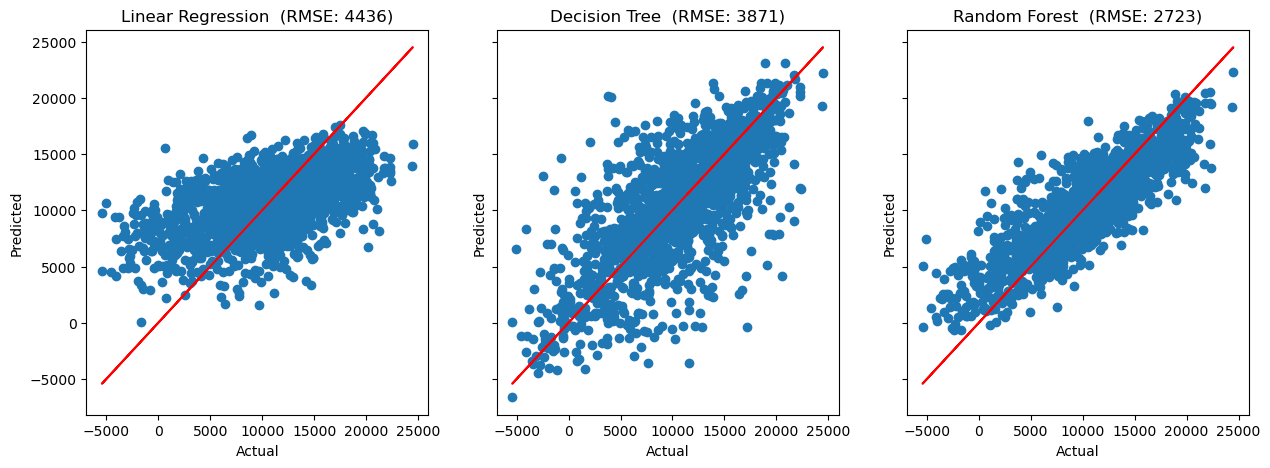

In [214]:
# Compare model performance
# plot predicted output vs expected output

# Create figure and axes
f, ax = plt.subplots(figsize=(15,5), nrows=1, ncols=3, sharey=True)

# Create list of titles and predictions to use in for loop
pred = [lr.predict(X_test), dt.predict(X_test), rf.predict(X_test)]
title = ['Linear Regression', 'Decision Tree', 'Random Forest']

# Loop through all axes to plot each model's results
for i in range(3):
    rmse = round(np.sqrt(mean_squared_error(pred[i], y_test)))
    ax[i].set_title(title[i]+"  (RMSE: "+str(rmse)+ ")")
    ax[i].set_xlabel('Actual')
    ax[i].set_ylabel('Predicted')
    ax[i].plot(y_test,y_test,'r')
    ax[i].scatter(y_test,pred[i])

In [215]:
# Choose best model and motivate why it is the best choice

The Random Forest Regression model performed the best, because it has the lowest RMSE of the 3 models

<a id="seven"></a>
## 7. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model explanation ⚡ |
| :--------------------------- |
| In this section, you are required to discuss how the best performing model works in a simple way so that both technical and non-technical stakeholders can grasp the intuition behind the model's inner workings. |

---

In [216]:
# discuss chosen methods logic

The Random Forest Regression model is an ensemble method built on decision trees, so it relies on aggregating the results of an ensemble of decision trees.

A simple example, you want to the predict the price of a house. You're not going to rely on one person's opinion, you're going to ask a whole bunch of different people who know about houses, such as real estate agents, contractors, and appraisers. You'd take their average opinion because it's likely to be more accurate than just one person's guess. This is somewhat similar to how a Random Forest Regression works.

## Final Submission

In [217]:
y_pred = rf.predict(test)
y_pred

array([ 9553.79666667,  6938.90666667,  7708.65      , ...,
       12812.43666667, 12608.30333333, 14236.46      ])

In [218]:
df = pd.DataFrame(y_pred, columns=['load_shortfall_3h'])
df.head()

,load_shortfall_3h
0,9553.796667
1,6938.906667
2,7708.650000
3,9664.353333
4,10134.300000


In [219]:
sol = pd.read_csv("df_test.csv")
sol.head()

,Unnamed: 0,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,Barcelona_wind_deg,Madrid_clouds_all,Seville_wind_speed,Barcelona_rain_1h,Seville_pressure,Seville_rain_1h,Bilbao_snow_3h,Barcelona_pressure,Seville_rain_3h,Madrid_rain_1h,Barcelona_rain_3h,Valencia_snow_3h,Madrid_weather_id,Barcelona_weather_id,Bilbao_pressure,Seville_weather_id,Valencia_pressure,Seville_temp_max,Madrid_pressure,Valencia_temp_max,Valencia_temp,Bilbao_weather_id,Seville_temp,Valencia_humidity,Valencia_temp_min,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min
0,8763,2018-01-01 00:00:00,5.000000,level_8,0.0,5.000000,87.000000,71.333333,20.000000,3.000000,0.000000,193.333333,4.000000,176.666667,0.0,1.000000,0.0,sp25,0.0,0,1017.333333,0.0,0.0,0.0,0,800.0,800.000000,1025.666667,800.000000,NaN,284.483333,1030.000000,287.483333,287.483333,801.000000,283.673333,46.333333,287.483333,287.816667,280.816667,287.356667,276.150000,280.380000,286.816667,285.150000,283.150000,279.866667,279.150000
1,8764,2018-01-01 03:00:00,4.666667,level_8,0.0,5.333333,89.000000,78.000000,0.000000,3.666667,0.000000,143.333333,4.666667,266.666667,0.0,0.666667,0.0,sp25,0.0,0,1020.333333,0.0,0.0,0.0,0,800.0,800.333333,1026.666667,800.000000,NaN,282.483333,1030.333333,284.150000,284.150000,721.000000,281.673333,53.666667,284.150000,284.816667,280.483333,284.190000,277.816667,281.010000,283.483333,284.150000,281.150000,279.193333,278.150000
2,8765,2018-01-01 06:00:00,2.333333,level_7,0.0,5.000000,89.000000,89.666667,0.000000,2.333333,6.666667,130.000000,4.000000,263.333333,0.0,0.666667,0.0,sp25,0.0,0,1023.000000,0.0,0.0,0.0,0,800.0,800.000000,1025.333333,800.333333,NaN,280.816667,1030.666667,282.816667,282.816667,800.000000,280.613333,42.000000,282.816667,284.483333,276.483333,283.150000,276.816667,279.196667,281.816667,282.150000,280.483333,276.340000,276.150000
3,8766,2018-01-01 09:00:00,2.666667,level_7,0.0,5.333333,93.333333,82.666667,26.666667,5.666667,6.666667,196.666667,2.333333,86.666667,0.0,1.333333,0.0,sp25,0.0,0,1025.666667,0.0,0.0,0.0,0,800.0,800.000000,1025.000000,800.333333,NaN,281.150000,1032.333333,283.483333,283.483333,801.333333,279.936667,45.000000,283.483333,284.150000,277.150000,283.190000,279.150000,281.740000,282.150000,284.483333,279.150000,275.953333,274.483333
4,8767,2018-01-01 12:00:00,4.000000,level_7,0.0,8.666667,65.333333,64.000000,26.666667,10.666667,0.000000,233.333333,4.666667,283.333333,0.0,1.000000,0.0,sp25,0.0,0,1026.000000,0.0,0.0,0.0,0,800.0,800.333333,1022.333333,800.000000,NaN,287.150000,1032.333333,287.150000,287.150000,801.333333,285.570000,41.000000,287.150000,287.483333,281.150000,286.816667,281.816667,284.116667,286.150000,286.816667,284.483333,280.686667,280.150000


In [220]:
sol['load_shortfall_3h']=df['load_shortfall_3h']
sol=sol[['time', 'load_shortfall_3h']]
sol.head()

,time,load_shortfall_3h
0,2018-01-01 00:00:00,9553.796667
1,2018-01-01 03:00:00,6938.906667
2,2018-01-01 06:00:00,7708.650000
3,2018-01-01 09:00:00,9664.353333
4,2018-01-01 12:00:00,10134.300000


In [221]:
sol

,time,load_shortfall_3h
0,2018-01-01 00:00:00,9553.796667
1,2018-01-01 03:00:00,6938.906667
2,2018-01-01 06:00:00,7708.650000
3,2018-01-01 09:00:00,9664.353333
4,2018-01-01 12:00:00,10134.300000
...,...,...
2915,2018-12-31 09:00:00,12189.106667
2916,2018-12-31 12:00:00,12851.790000
2917,2018-12-31 15:00:00,12812.436667
2918,2018-12-31 18:00:00,12608.303333


In [222]:
sol.to_csv('./Shawn_Johnson_submission_2.csv', index=False)